## **Statistics for Business**
- Worked on by ***Taufik Budi Wibowo***
- Dataset from IBM HR Employee Attrition and Performance

**Outline**
- Import Library
- Data Understanding
- Data Pre-Processing
- Exploratory Data Analysis
- Feature Engineering and Selection
- Modelling

**Import Library**

In [1]:
#Import important library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import inflection #ToConvertFrom CamelCase to SnakeCase
import statsmodels.formula.api as smf
from scipy.special import expit,logit
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

**Data Understanding**

In [2]:
#Read dataset from csv file
data = pd.read_csv('E:\Bootcamp Technical\Project Data Analysis\WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#Understanding type of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
#Understanding unique value of the features
unique_attribute = []

for col in data.columns:
    unique_attribute.append([col,data[col].unique(),data[col].nunique()])

unique_attribute = pd.DataFrame(data=unique_attribute, columns = ['column','unique_value','total'])
unique_attribute

,column,unique_value,total
0,Age,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...",43
1,Attrition,"[Yes, No]",2
2,BusinessTravel,"[Travel_Rarely, Travel_Frequently, Non-Travel]",3
3,DailyRate,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...",886
4,Department,"[Sales, Research & Development, Human Resources]",3
5,DistanceFromHome,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...",29
6,Education,"[2, 1, 4, 3, 5]",5
7,EducationField,"[Life Sciences, Other, Medical, Marketing, Tec...",6
8,EmployeeCount,[1],1
9,EmployeeNumber,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,...",1470


**Data Pre-Processing**

In [5]:
#Change the columns from Camel Case into Snake Case
cols_oldname = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

snakecase = lambda x: inflection.underscore(x)

cols_newname = list(map(snakecase, cols_oldname))

data.columns = cols_newname

In [6]:
#Classify the age number feature
def age_range(age):
    if age > 65:
        return 'seniors'
    elif age > 50:
        return 'elderly'
    elif age > 35:
        return 'middle'
    elif age > 19:
        return 'youth & adult'
    else:
        return 'unknown'

data['age_group'] = data['age'].apply(lambda age: age_range(age))

**Exploratory Data Analysis (EDA)**

*Descriptive Statistics*

In [7]:
#Descriptive statistics to get more info about the numerical features
num_col = data.select_dtypes(include='number')
mean = pd.DataFrame(num_col.apply(np.mean)).T
median = pd.DataFrame(num_col.apply(np.median)).T
std = pd.DataFrame(num_col.apply(np.std)).T
min_value = pd.DataFrame(num_col.apply(np.min)).T
max_value = pd.DataFrame(num_col.apply(np.max)).T
range_value = pd.DataFrame(num_col.apply(lambda x: x.max() - x.min())).T
skewness = pd.DataFrame(num_col.apply(lambda x: x.skew())).T
kurtosis = pd.DataFrame(num_col.apply(lambda x: x.kurtosis())).T

desc_stat = pd.concat([min_value, max_value, range_value, mean, median, std, skewness, kurtosis]).T.reset_index()
desc_stat.columns = ['attributes','min','max','range','mean','median','std','skewness','kurtosis']

In [8]:
desc_stat

,attributes,min,max,range,mean,median,std,skewness,kurtosis
0,age,18.0,60.0,42.0,36.923810,36.0,9.132266,0.413286,-0.404145
1,daily_rate,102.0,1499.0,1397.0,802.485714,802.0,403.371829,-0.003519,-1.203823
2,distance_from_home,1.0,29.0,28.0,9.192517,7.0,8.104107,0.958118,-0.224833
3,education,1.0,5.0,4.0,2.912925,3.0,1.023817,-0.289681,-0.559115
4,employee_count,1.0,1.0,0.0,1.000000,1.0,0.000000,0.000000,0.000000
5,employee_number,1.0,2068.0,2067.0,1024.865306,1020.5,601.819530,0.016574,-1.223179
6,environment_satisfaction,1.0,4.0,3.0,2.721769,3.0,1.092710,-0.321654,-1.202521
7,hourly_rate,30.0,100.0,70.0,65.891156,66.0,20.322512,-0.032311,-1.196398
8,job_involvement,1.0,4.0,3.0,2.729932,3.0,0.711319,-0.498419,0.270999
9,job_level,1.0,5.0,4.0,2.063946,2.0,1.106563,1.025401,0.399152


In [9]:
#Drop unused columns after understanding the data
cols_to_drop = ['employee_number','employee_count','standard_hours','over18']
data = data.drop(cols_to_drop,axis=1)

*Univariate Analysis*

In [10]:
# Employee's education level
data['education'] = data['education'].apply(lambda x: 'Bellow College' if x == 1 
                                                          else 'College' if x == 2 
                                                          else 'Bachelor' if x == 3 
                                                          else 'Master' if x == 4 
                                                          else 'Doctor')

# How satisfied the employee is with the company's environment 
data['environment_satisfaction'] = data['environment_satisfaction'].apply(lambda x: 'Low' if x == 1 
                                                                                        else 'Medium' if x == 2 
                                                                                        else 'High' if x == 3 
                                                                                        else 'Very High')

# How involved the employee feels with his/her job 
data['job_involvement'] = data['job_involvement'].apply(lambda x: 'Low' if x == 1
                                                                      else 'Medium' if x == 2 
                                                                      else 'High' if x == 3 
                                                                      else 'Very High')

# Employee's job level
data['job_level'] = data['job_level'].apply(lambda x: 'Junior' if x == 1
                                                                else 'Mid' if x == 2 
                                                                else 'Senior' if x == 3 
                                                                else 'Manager' if x ==4 
                                                                else 'Director')

# How satisfied the employee feels with his/her job
data['job_satisfaction'] = data['job_satisfaction'].apply(lambda x: 'Low' if x == 1
                                                                        else 'Medium' if x == 2
                                                                        else 'High' if x == 3 
                                                                        else 'Very High')

# Employee's performance rating 
data['performance_rating'] = data['performance_rating'].apply(lambda x: 'Low' if x == 1
                                                                            else 'Good' if x == 2
                                                                            else 'Excellent' if x == 3 
                                                                            else 'Outstanding')

# How satisfied the employee feels with the relationship with his/her manager
data['relationship_satisfaction'] = data['relationship_satisfaction'].apply(lambda x: 'Low' if x == 1
                                                                                          else 'Medium' if x == 2
                                                                                          else 'High' if x == 3 
                                                                                          else 'Very High')

# How the employee feels about his/her work life balance
data['work_life_balance'] = data['work_life_balance'].apply(lambda x: 'Bad' if x == 1
                                                                          else 'Good' if x == 2
                                                                          else 'Better' if x == 3 
                                                                          else 'Best')

Percentage of employees who stayed : 1233 or 83.88%
Percentage of employees who left: 237 or 16.12%


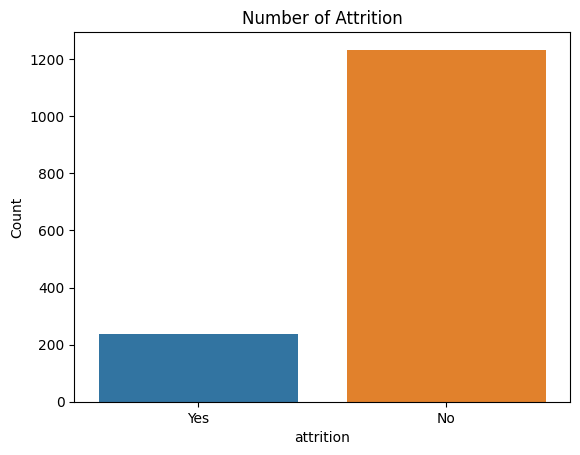

In [11]:
#Number of attrition plot
emp_attr0 = data['attrition'].value_counts()[0]
emp_attr1 = data['attrition'].value_counts()[1]
print(f'Percentage of employees who stayed : {emp_attr0} or {(emp_attr0/data.shape[0])*100:.2f}%')
print(f'Percentage of employees who left: {emp_attr1} or {(emp_attr1/data.shape[0])*100:.2f}%')

sns.countplot(x='attrition', data=data)
plt.title('Number of Attrition')
plt.ylabel('Count')
plt.show()


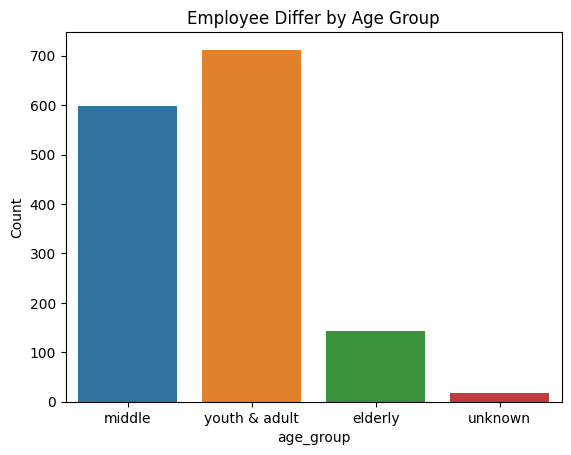

In [12]:
#Number employee differ by age group
sns.countplot(x='age_group', data=data)
plt.title('Employee Differ by Age Group')
plt.ylabel('Count')
plt.show()

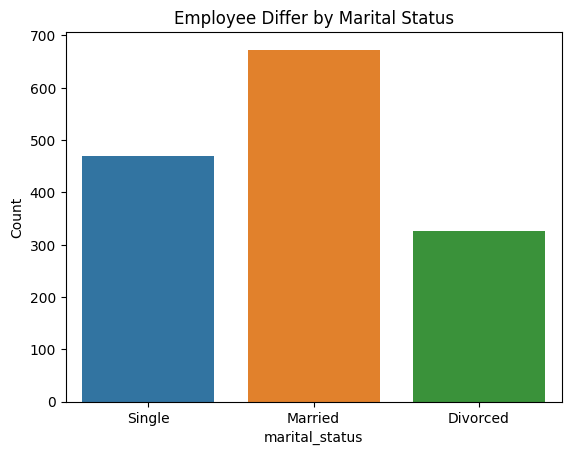

In [13]:
#Number employee differ by marital status
sns.countplot(x='marital_status', data=data)
plt.title('Employee Differ by Marital Status')
plt.ylabel('Count')
plt.show()

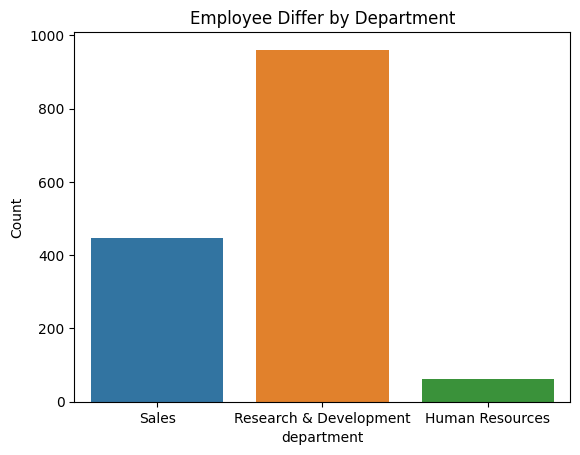

In [14]:
#Number employee differ by department
sns.countplot(x='department', data=data)
plt.title('Employee Differ by Department')
plt.ylabel('Count')
plt.show()

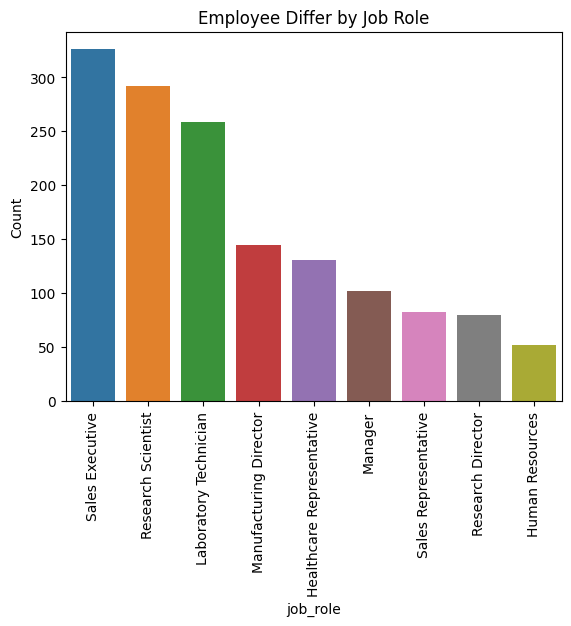

In [15]:
#Number employee differ by job role
sns.countplot(x='job_role', data=data)
plt.title('Employee Differ by Job Role')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

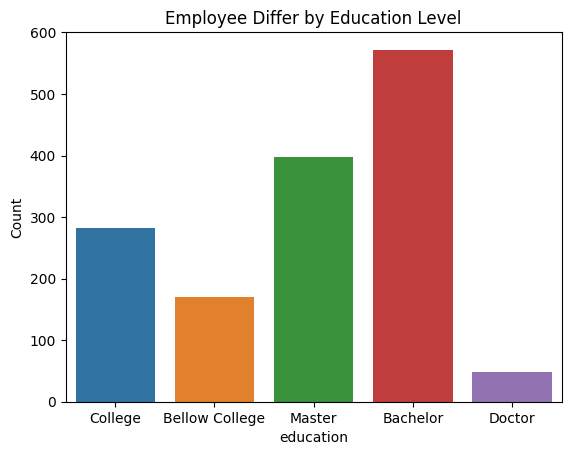

In [16]:
#Number employee differ by education level
sns.countplot(x='education', data=data)
plt.title('Employee Differ by Education Level')
plt.ylabel('Count')
plt.show()

Percentage of employees that no over time : 1054 or 71.70%
Percentage of employees that over time: 416 or 28.30%


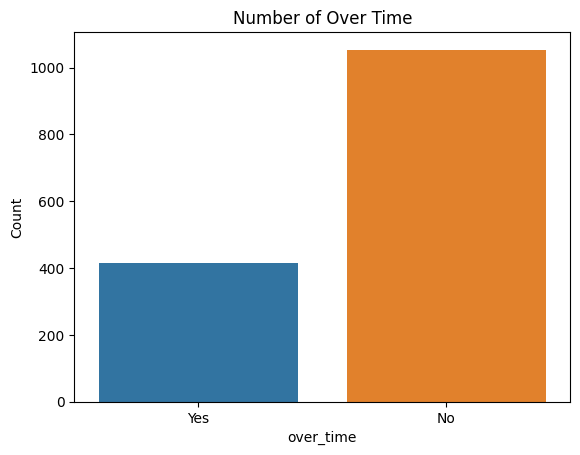

In [17]:
#Number of over time
emp_ovt0 = data['over_time'].value_counts()[0]
emp_ovt1 = data['over_time'].value_counts()[1]
print(f'Percentage of employees that no over time : {emp_ovt0} or {(emp_ovt0/data.shape[0])*100:.2f}%')
print(f'Percentage of employees that over time: {emp_ovt1} or {(emp_ovt1/data.shape[0])*100:.2f}%')

sns.countplot(x='over_time', data=data)
plt.title('Number of Over Time')
plt.ylabel('Count')
plt.show()

From the univariate analysis of the features that I mentioned above, I got several insight,
- There is 16.12% from total employee that decided to left the company in given period.
- Most of the employee are married, age range youth & adult, and have bachelor degree.
- Department with high count of employee is RND and from the job role is Sales Executive.
- There is a 28.30% overtime rate which indicates that most of the workforce works overtime.

*Bivariate Analysis*

In [18]:
#Subplots Function for Multi-Graphs in one time
def plot_subplots(data, variables, titles, xlabels):
    # Function to create subplots
    def create_subplots(data, variable, title, xlabel, ax):
        sns.countplot(x=variable, hue='attrition', data=data, ax=ax)
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel('Count')

    # Calculate the number of rows needed
    num_rows = len(variables) // 2 + len(variables) % 2

    # Create subplots
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    # Plot the data
    for i, (variable, title, xlabel) in enumerate(zip(variables, titles, xlabels)):
        if i < len(axes):
            create_subplots(data, variable, title=title, xlabel=xlabel, ax=axes[i])

    if len(variables) % 2 == 1:
        fig.delaxes(axes[-1])

    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()

In [19]:
#Countplot Function for Single-Graph in one time
def plot_cplts(df, x, title, xlabel):
    attr_counts = df.groupby([x, 'attrition']).size().unstack()
    attr_counts = attr_counts.iloc[:, ::-1]
    
    colors = ['tab:orange','tab:blue']
    fig,ax = plt.subplots(figsize=(8,6))

    attr_counts.plot(kind='bar', stacked=True, ax=ax, color=colors)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), title='Attrition', loc='upper right')

    plt.xticks(rotation=90)
    plt.show()


In [20]:
#Kdeplot Function
def plot_kde_subplots(left_data, stay_data, titles, xlabels):
    # Function to create subplots with KDE plots
    def create_kde_subplots(left_data, stay_data, title, xlabel, ax):
        sns.kdeplot(data=left_data, ax=ax, label='Left', shade=True)
        sns.kdeplot(data=stay_data, ax=ax, label='Stayed', shade=True)
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel('Density')
        ax.legend()

    # Calculate the number of rows needed
    num_rows = len(left_data) // 2 + len(left_data) % 2

    # Create subplots
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    # Plot the KDE plots
    for i, (left_var, stay_var, title, xlabel) in enumerate(zip(left_data, stay_data, titles, xlabels)):
        if i < len(axes):
            create_kde_subplots(left_var, stay_var, title=title, xlabel=xlabel, ax=axes[i])

    if len(left_data) % 2 == 1:
        fig.delaxes(axes[-1])

    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()

In [21]:
# Define left and stayed employees
left = data[data['attrition'] == 'Yes']
stayed = data[data['attrition'] == 'No']

Grouping into 3 main groups
- Employee Satisfaction Group
- Employee Background Group
- Employee Job History Group

*Employee Satisfaction Group*

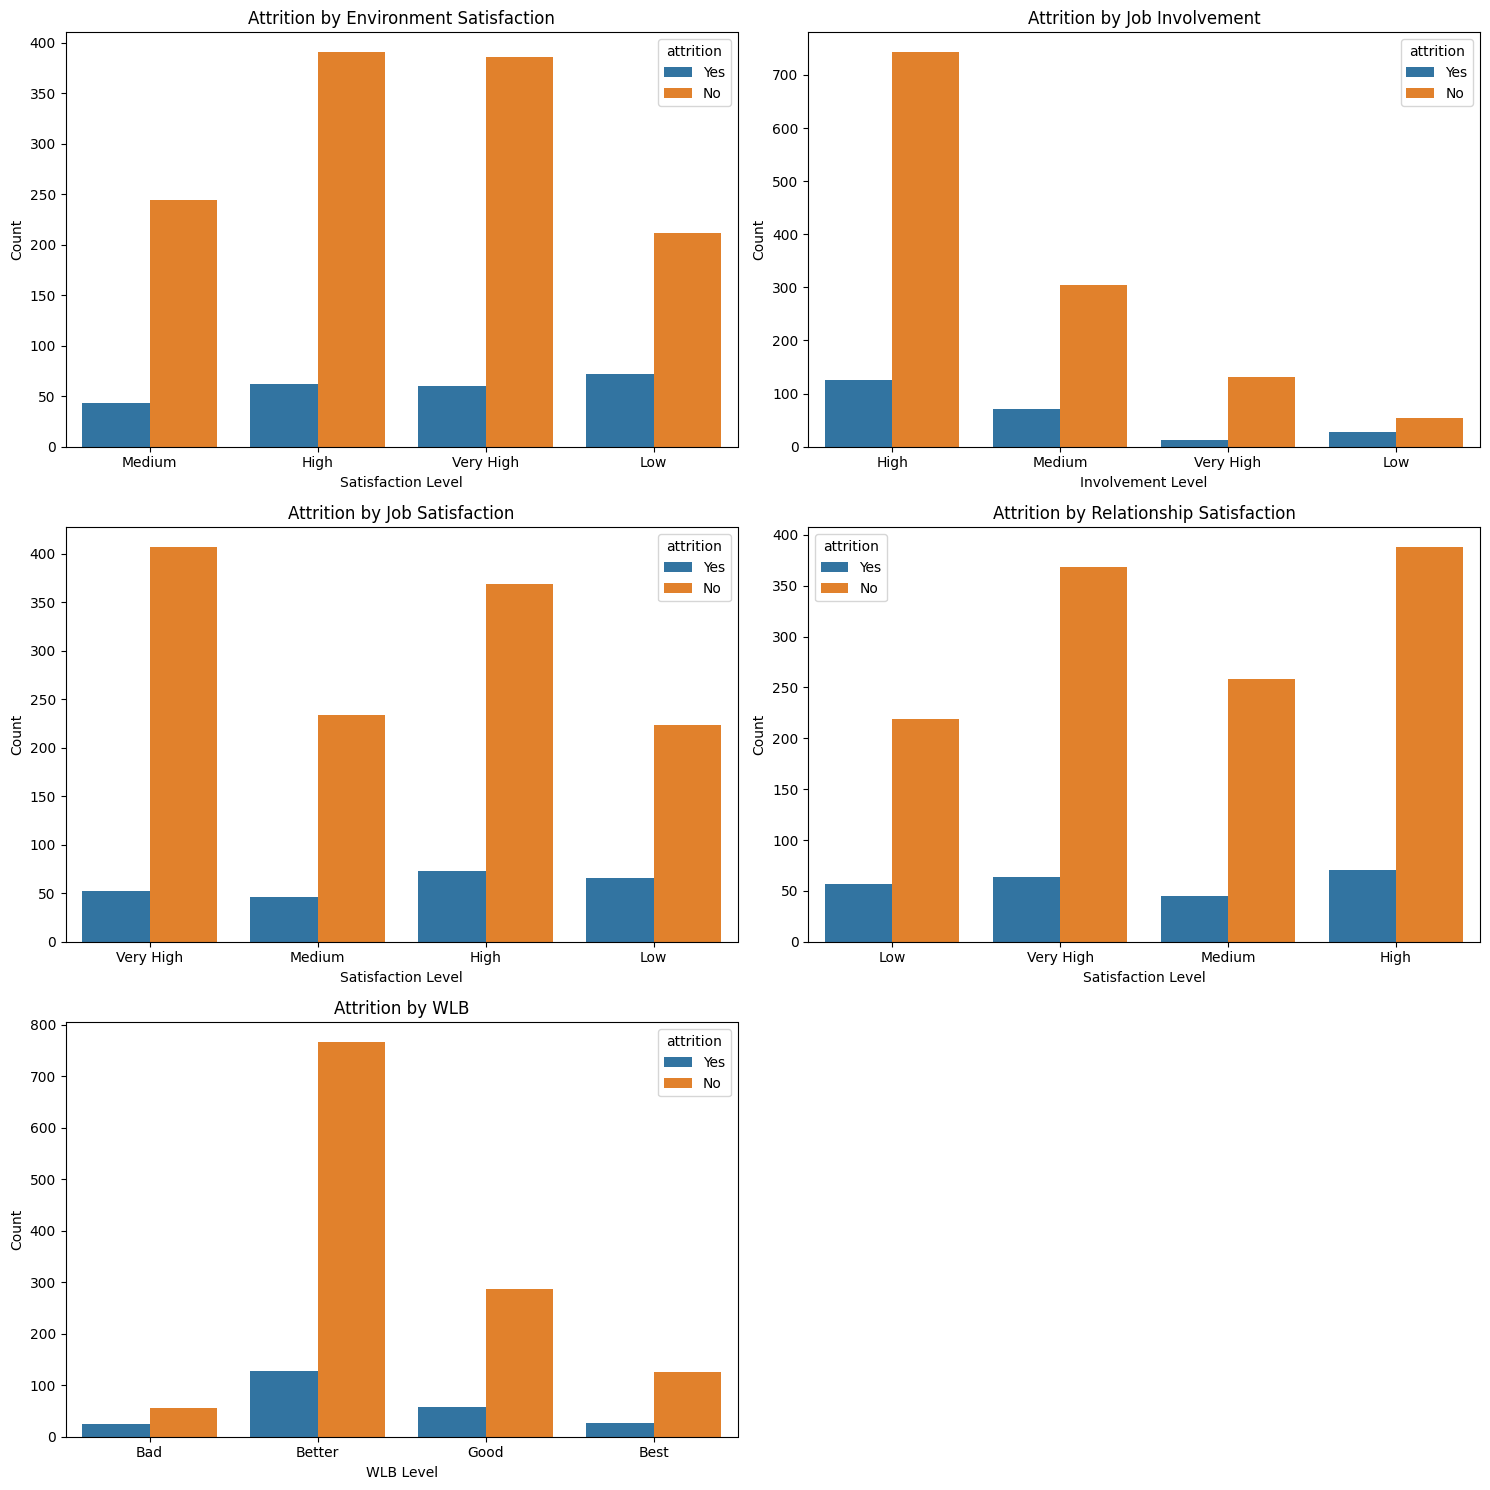

In [22]:
variables_sat = ['environment_satisfaction', 'job_involvement', 'job_satisfaction', 'relationship_satisfaction', 'work_life_balance']
titles = ['Attrition by Environment Satisfaction', 'Attrition by Job Involvement', 'Attrition by Job Satisfaction', 'Attrition by Relationship Satisfaction', 'Attrition by WLB']
xlabels = ['Satisfaction Level', 'Involvement Level', 'Satisfaction Level', 'Satisfaction Level', 'WLB Level']

plot_subplots(data, variables_sat, titles, xlabels)


From bivariate analysis on employee satisfaction group, we got the startling insights that employee that has high satisfaction, high involvement, and better work-life balance more likely to experience attrition.

*Employee Background Group*

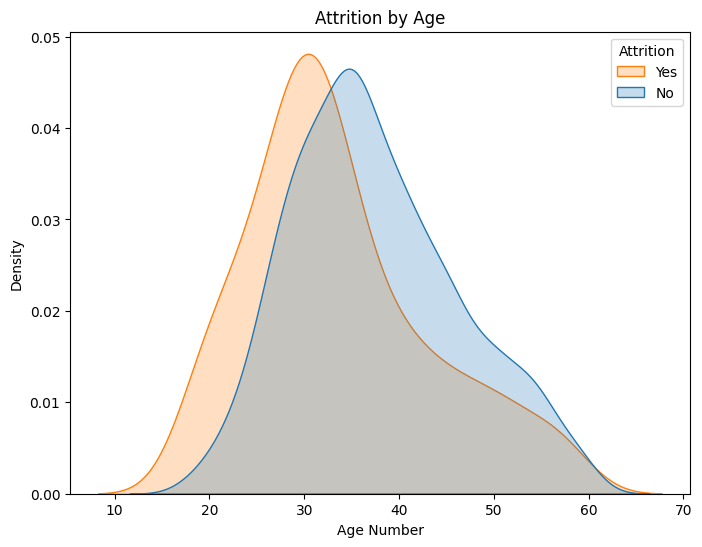

In [23]:
def plot_kde_with_colors(data_left, data_stay, title, xlabel):
    fig, ax = plt.subplots()
    ax.figure.set_size_inches(8,6)

    sns.kdeplot(data_left, label="Yes", shade=True, color='tab:orange')
    sns.kdeplot(data_stay, label="No", shade=True, color='tab:blue')

    ax.set_title(title)
    plt.xlabel(xlabel)
    plt.legend(title='Attrition')
    plt.show()

left_data = left['age']
stay_data = stayed['age']
plot_kde_with_colors(left_data, stay_data, 'Attrition by Age', 'Age Number')

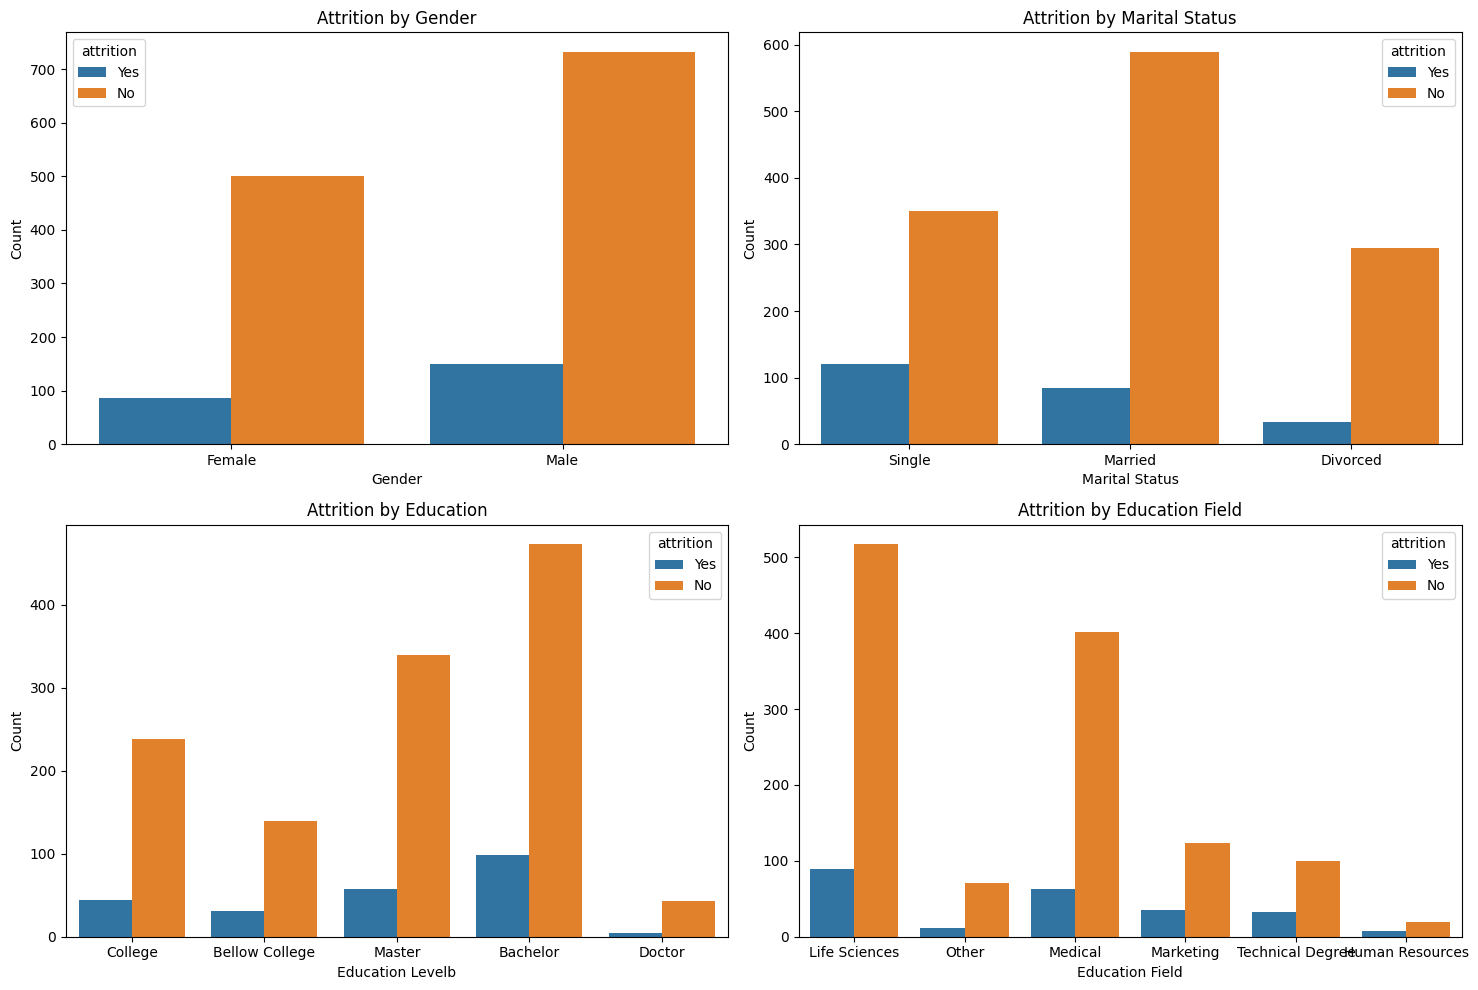

In [24]:
variables_sat = ['gender','marital_status','education','education_field']
titles = ['Attrition by Gender', 'Attrition by Marital Status', 'Attrition by Education', 'Attrition by Education Field']
xlabels = ['Gender', 'Marital Status', 'Education Levelb','Education Field']

plot_subplots(data, variables_sat, titles, xlabels)

From bivariate analysis on employee background group, we got insight about demographic and educational characteristics that are associated with a higher likelihood of attrition. Employees who are male, around 40 years old, single, hold a bachelor's degree, and come from background study in life sciences are more likely to experience attrition.

*Employee History Group*

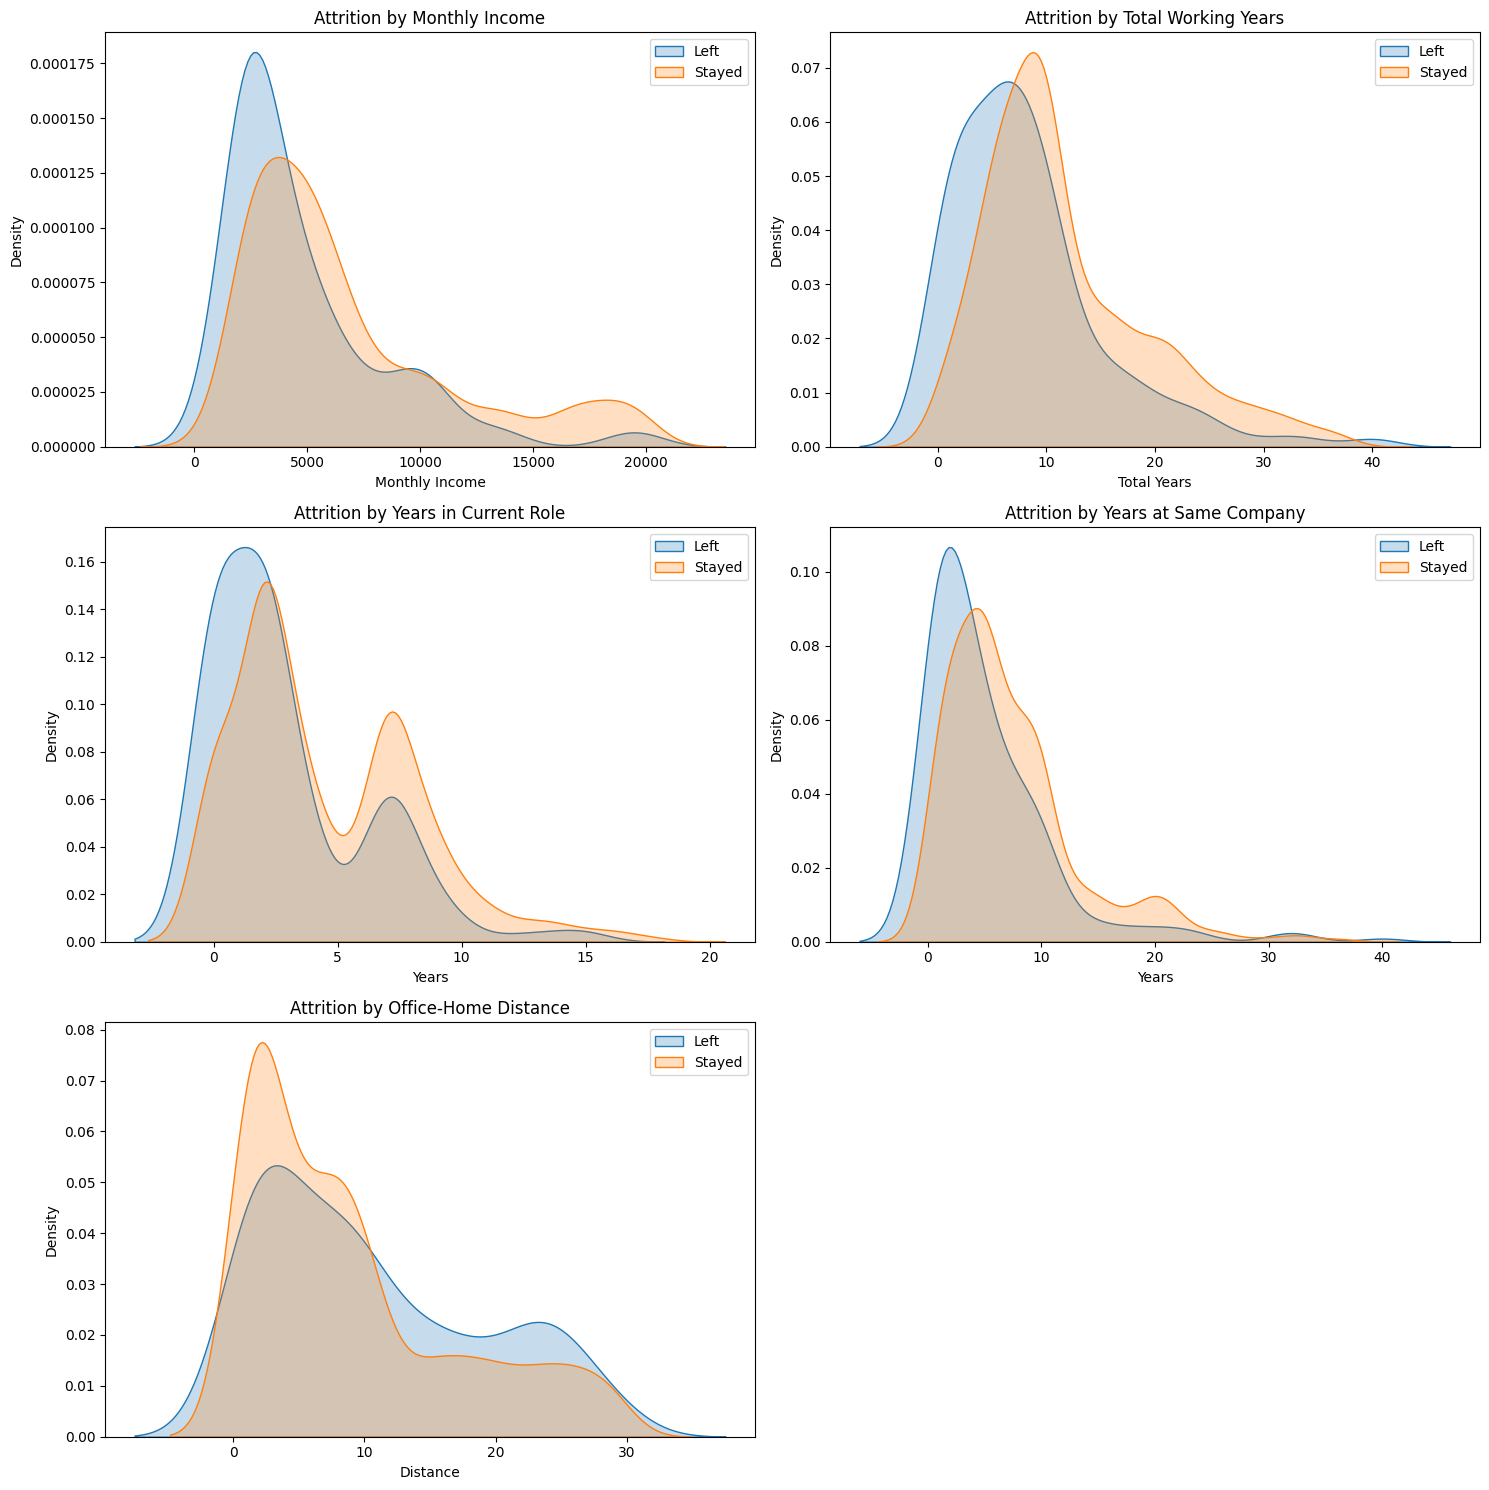

In [25]:
column_names = ['monthly_income', 'total_working_years', 'years_in_current_role', 'years_at_company', 'distance_from_home']
variables_sat = [left[column_name] for column_name in column_names]
stay_data = [stayed[column_name] for column_name in column_names]

titles = [
    'Attrition by Monthly Income', 'Attrition by Total Working Years', 
    'Attrition by Years in Current Role', 'Attrition by Years at Same Company', 
    'Attrition by Office-Home Distance'
]
xlabels = ['Monthly Income', 'Total Years', 'Years', 'Years', 'Distance']

plot_kde_subplots(variables_sat, stay_data, titles, xlabels)


- From the graph above, we identified that employees with long tenures in terms of total working years, years in current role and years at the same company are more likely to experience attrition, but in total years above 40 most of them decided to stay. 
- Employee with long-distance commutes to their workplace are more likely to left with the company and employee who have highly income are more likely to stay.

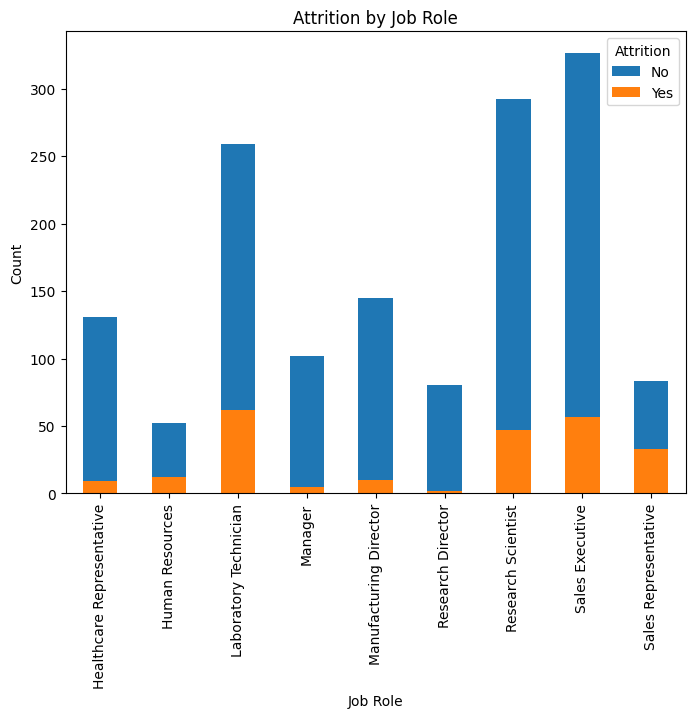

In [26]:
plot_cplts(data, 'job_role', title='Attrition by Job Role', xlabel='Job Role')

From the graph above, we revealed that employees with the job role of laboratory technician are more likely to experience attrition compared to employees in other roles within the company.

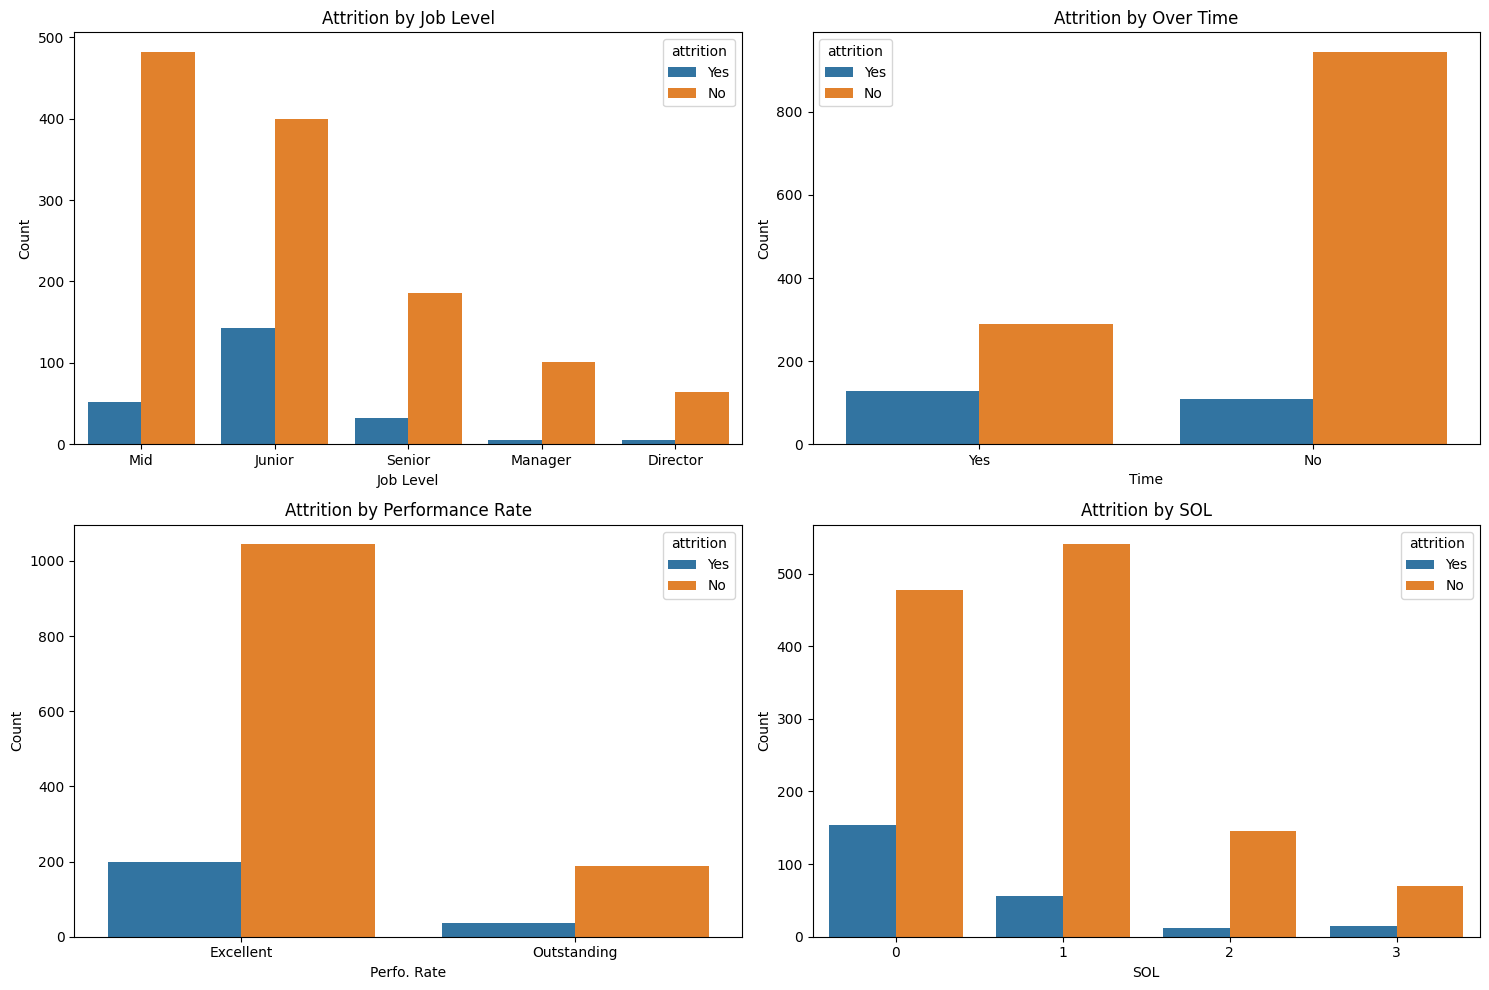

In [27]:
variables_sat = ['job_level','over_time','performance_rating','stock_option_level']
titles = [ 'Attrition by Job Level', 'Attrition by Over Time', 'Attrition by Performance Rate','Attrition by SOL']
xlabels = ['Job Level','Time','Perfo. Rate','SOL']

plot_subplots(data, variables_sat, titles, xlabels)

- From this bivariate analysis, I uncovered significant pattern that employees at the junior job level and those with stock option 0 are more likely to experience attrition.
- And there are a noteworthy trend that employees with a history of overtime experience and a record of excellent performance are more likely to experience attrition.

*Correlation Heatmap*

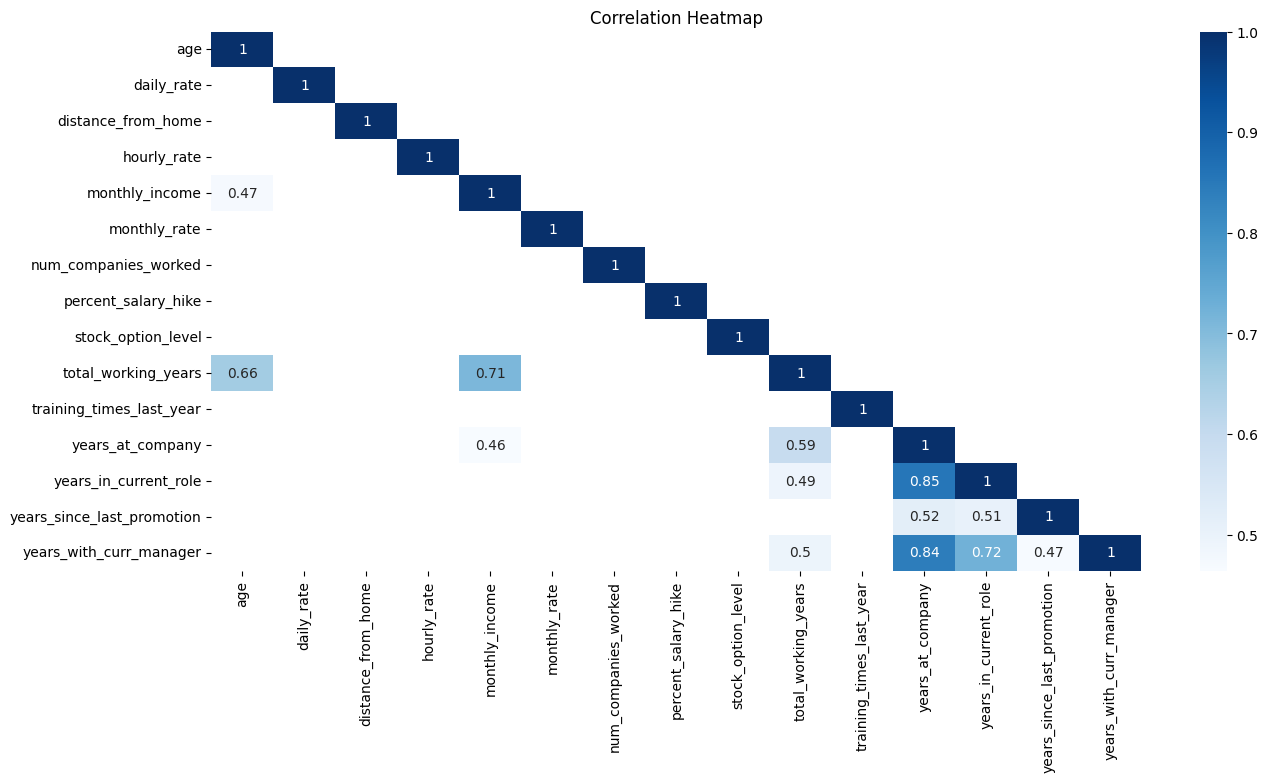

In [28]:
data_corr = data.corr(method="spearman", numeric_only=True)
#peta heatmap untuk mempermudah melihat korelasi antar fitur
plt.figure(figsize=(15, 7))

trimask = np.triu(np.ones_like(data_corr), k=1)  # Use k=1 to exclude the diagonal
sns.heatmap(data=data_corr, annot=True, cmap="Blues", mask=trimask | (np.abs(data_corr) <= 0.4))
plt.title("Correlation Heatmap")
plt.show()

From the heatmap correlation I revealed that there is strong correlation between employee working years and creer-related factors.

**FEATURE ENGINEERING AND SELECTION**

*Encode Categorical Columns*

In [29]:
#Encode categorical features
encode_cat_col = data.select_dtypes(exclude='number')

for col in encode_cat_col:
   data[col] = LabelEncoder().fit_transform(data[col])

data.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,...,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,age_group
0,41,1,2,1102,2,1,2,1,2,0,...,1,0,8,0,0,6,4,0,5,1
1,49,0,1,279,1,8,1,1,0,1,...,3,1,10,3,2,10,7,1,7,1
2,37,1,2,1373,1,2,2,4,3,1,...,2,0,7,3,2,0,0,0,0,1
3,33,0,1,1392,1,3,4,1,3,0,...,0,0,8,3,2,8,7,3,0,3
4,27,0,2,591,1,2,1,3,1,1,...,3,1,6,3,2,2,2,2,2,3


*Checking Missing Values*

In [30]:
#Check Missing Value
missing = data.isnull().sum()[data.isnull().sum()>0]
missing_val = pd.DataFrame({'NaN_count':missing, 'NaN_percentage':missing/len(data)})
missing_val = missing_val.sort_values(by='NaN_percentage', ascending=False)
missing_val

,NaN_count,NaN_percentage


*Checking Duplicated Values*

In [31]:
#Checking duplicated values
data[data.duplicated(keep=False)].tail(5)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,...,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,age_group


*Select The Features for Modelling*

In [32]:
#Select the features based on their correlation strength
correlation_matrix = data.corr()
correlation_threshold = 0.16  # Set your correlation threshold
attrition_correlations = correlation_matrix['attrition']

selected_features = attrition_correlations[abs(attrition_correlations) > correlation_threshold].drop('attrition').index.tolist()
print("Selected features based on correlation:", selected_features)

Selected features based on correlation: ['marital_status', 'over_time', 'total_working_years', 'years_in_current_role']


**Modelling**

In [33]:
#Build the model using logistic regression
logit_model = smf.logit('attrition ~ ' + ' + '.join(selected_features), data)
model_attr = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.379320
         Iterations 7


In [34]:
#Print the coefficient
def print_coef_std_err(results):
    coef = results.params
    std_err = results.bse

    df = pd.DataFrame(data=np.transpose([coef, std_err]),
                      index = coef.index,
                      columns=['coef','std err'])
    
    return df

results_attr_coef = print_coef_std_err(model_attr)
results_attr_coef

,coef,std err
Intercept,-2.073815,0.215270
marital_status,0.636741,0.110087
over_time,1.442493,0.155120
total_working_years,-0.057165,0.013235
years_in_current_role,-0.088661,0.028122


**P(Attrition) = logit^-1 (-2.07 + 0.64 marital_status + 1.44 over_time - 0.057 total_working_years - 0.089 years_in_current_role)**

In [35]:
#Inverse logit for the intercept
expit(-2.07)

0.11204703855699032

1. Intercept term
   The intercept represents the probability of attrition when all predictors are set to zero. In this case (assuming this will be make sense) when all other factors are held constant, the log-odds of attrition are -2.07. Or we can say that my model predicts a probability of attrition of approximately 11.2%.

2. Coefficient for marital status
   Positive coefficient for marital status suggests that being married is associated with a higher likelihood of attrition. Specifically, for every unit increase in the marital status feature, the log-odds of attrition increase by 0.63, holding all other features constant. For the context of probability scale, I divide it by 4: 0.63/4 = 0.1575. Therefore, being married, compared to being single (assuming all else is equal), corresponds to an approximate 15.75% increase in the probability of attrition.

3. Coefficient for over time
   Over time coefficient is possitive that indicating employees who work overtime are more likely to experience attrition. The log-odds of attrition increase by 1.44, holding other factors constant. For the context of probability, we divide it by 4: 1.44/4 = 0.36. So, when comparing employees who work overtime to those who don't with assuming all factors are constant, the probability of attrition increases by approximately 36%.

4. Coefficient for total working years
   The coefficient for total working years is negative, suggesting that as the total working years increase, the log-odds of attrition decrease slightly. However, the effect size relatively small, with a decrease of 0.05 in log-odds for each year of working.

5. Coefficient for years in current role
   Similarly with total working years, the negative coefficient for years in the current role implies that as the number of years in the current role increases, the log-odds of attrition decrease. This suggests that employees who stay in their current role for longer periods are less likely to leave.

##### ***Evaluation***

*1. Null Model*

In [36]:
'''
Consider that I'm just guessing the predicted probability
from the concept of flipping coin (p=0.5)
'''
prob = 0.5

attrition = data['attrition'].copy()

logscore_null_model = np.sum(attrition * np.log(prob)+(1-attrition)*np.log(1-prob))
logscore_null_model

-1018.9263554231196

In [37]:
#Input into dataframe
logscore = pd.DataFrame(data=logscore_null_model, columns= ['log_score'], index= ['null_model'])

*2. Baseline Model*

In [38]:
'''
Consider that I'm just guessing the predicted probability
using proportion of attrition feature
'''
prob = round(np.sum(attrition)/len(attrition),2)

logscore_baseline_model = np.sum(attrition * np.log(prob)+(1-attrition)*np.log(1-prob))
logscore_baseline_model

-649.2995332578605

In [39]:
#Input into dataframe
logscore.loc['baseline_model','log_score'] = logscore_baseline_model

*3. Logistic Model*

In [40]:
'''
Consider that I'm calculating the predicted probability
by including some predictors to predict attrition
'''
pred_prob_attr = model_attr.predict(data[selected_features])

logscore_logreg_model1 = np.sum(attrition * np.log(pred_prob_attr)+(1-attrition)*np.log(1-pred_prob_attr))
logscore_logreg_model1

-557.6006780492992

In [41]:
#Input into dataframe
logscore.loc['logreg_model','log_score'] = logscore_logreg_model1
logscore

,log_score
null_model,-1018.926355
baseline_model,-649.299533
logreg_model,-557.600678


*4. Difference of Log Score*

In [42]:
#Compare logistics regression model with null model
diff_logscore = logscore['log_score']['logreg_model']-logscore['log_score']['null_model']
diff_logscore

461.32567737382044

Including predictors into the model is clearly improves the predictive accuracy. The result, 461.32 diff. of log score, show us how accurate we predict the probabilities of the model. 

*5. LeaveOneOut Cross Validation*

In [43]:
#Splitting helper function
def loo_split(data):
    loo = LeaveOneOut()
    fold_train = {}
    fold_test = {}

    for i, (train,test) in enumerate(loo.split(data)):
        fold_train[i] = data.iloc[train].copy()
        fold_test[i] = data.iloc[test].copy()
    
    return(fold_train,fold_test)

In [44]:
#Data splitting
fold_train, fold_test = loo_split(data = data)

In [45]:
#Predicted probabilities function
pred_list = []

for i in range(len(data)):
    # Define the model outside the loop if the structure remains the same
    model_formula = 'attrition ~ over_time + total_working_years + marital_status + years_in_current_role'
    model = smf.logit(formula=model_formula, data=fold_train[i])
    
    # Fit the model
    fit = model.fit(disp=0)
    
    # Make predictions on test data
    test_data = fold_test[i][['over_time', 'total_working_years', 'marital_status','years_in_current_role']]
    pred = fit.predict(test_data)
    pred_list.append(pred)

In [46]:
#Prediction process
prediction = pd.DataFrame(data = np.array(pred_list), columns=['test_pred_prob'])
prediction['y'] = [fold_test[i]['attrition'].values[0] for i in range(len(data))]

prediction['log_score'] = prediction['y'] * np.log(prediction['test_pred_prob']) + (1-prediction['y'] * np.log(1-prediction['test_pred_prob']))

prediction.head()

,test_pred_prob,y,log_score
0,0.454745,1,0.818484
1,0.067370,0,1.000000
2,0.557239,1,1.229964
3,0.256201,0,1.000000
4,0.123931,0,1.000000


In [47]:
prediction['log_score'].mean()

0.8093612832844426

In [48]:
logscore_logreg_model_loo = np.sum(prediction["y"] * np.log(prediction["test_pred_prob"]) \
                                   + (1 - prediction["y"]) * np.log(1-prediction["test_pred_prob"]))
logscore_logreg_model_loo

-563.0514325503111

In [49]:
logscore.loc["logreg_model_loo","log_score"] = logscore_logreg_model_loo
logscore

,log_score
null_model,-1018.926355
baseline_model,-649.299533
logreg_model,-557.600678
logreg_model_loo,-563.051433


- From the evaluation stage, especially in LeaveOneOut Cross Validation section, I got that the model from LOO is lower than previous logistic regression model, that the LOO model score is 6 units lower. This indicates that LOO estimation model not as fit as previous calculation, but its not quite far, so it still acceptable.
- From the average log score of my model predictions across LOO iterations, I get a result of 0.809 or 0.81 if rounded. This result would indicate that a higher average log score usually indicates better prediction performance, as it shows that the predicted probability aligns with the actual outcome by 81%.